In [ ]:
# Import necessary modules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

In [ ]:
from google.colab import files
import pandas as pd

# Upload file from your system
uploaded = files.upload()

# Read the uploaded file
df = pd.read_excel(list(uploaded.keys())[0])
print(df.head())


Saving Apriori data.xlsx to Apriori data.xlsx
  Transaction                                              Items Unnamed: 2  \
0           1  Priya Red chillies, MTR Chutney, Ito  Noodles,...        NaN   
1           2  DRY MIX SUGAR, URID ROUND, CLI GOLA, MASUR DP,...        NaN   
2           3  NevzelandArle, INP Fullapple, Greenapple, butt...        NaN   
3           4  Tata Coffee Powder Grand Filter, Tamarind  Pac...        NaN   
4           5  SUPREME HARVEST Byadagi Chilli Whole, Mtr Kash...        NaN   

  Unnamed: 3  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [ ]:
# Dropping columns with 'Unnamed' in their names
df = df.loc[:, ~df.columns.str.contains('^Unnamed', na=False)]

print("After removing unnecessary columns:")
print(df.head())

After removing unnecessary columns:
  Transaction                                              Items
0           1  Priya Red chillies, MTR Chutney, Ito  Noodles,...
1           2  DRY MIX SUGAR, URID ROUND, CLI GOLA, MASUR DP,...
2           3  NevzelandArle, INP Fullapple, Greenapple, butt...
3           4  Tata Coffee Powder Grand Filter, Tamarind  Pac...
4           5  SUPREME HARVEST Byadagi Chilli Whole, Mtr Kash...


In [ ]:
# Removing rows where all values are NaN
df = df.dropna(how='all')

# Removing columns where all values are NaN
df = df.dropna(axis=1, how='all')

print("After removing empty rows and columns:")
print(df.info())


After removing empty rows and columns:
<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 141
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  59 non-null     object
 1   Items        57 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB
None


In [ ]:
# Removing rows with NaN in the 'Item' column
transactions_cleaned = df.dropna(subset=['Items'])

print("After removing rows with missing items:")
print(transactions_cleaned.info())


After removing rows with missing items:
<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 0 to 140
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  57 non-null     object
 1   Items        57 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
None


In [ ]:
# Grouping items by transaction
transaction_lists = transactions_cleaned.groupby('Transaction')['Items'].apply(list)

print("Transaction lists grouped by Transaction ID:")
print(transaction_lists.head())

Transaction lists grouped by Transaction ID:
Transaction
1    [Priya Red chillies, MTR Chutney, Ito  Noodles...
2    [DRY MIX SUGAR, URID ROUND, CLI GOLA, MASUR DP...
3    [NevzelandArle, INP Fullapple, Greenapple, but...
4    [Tata Coffee Powder Grand Filter, Tamarind  Pa...
5    [SUPREME HARVEST Byadagi Chilli Whole, Mtr Kas...
Name: Items, dtype: object


In [ ]:
# Converting the transaction lists into a one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Using TransactionEncoder to transform the transaction lists
te = TransactionEncoder()
te_ary = te.fit(transaction_lists).transform(transaction_lists)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# Define all thresholds from 0.01 to 0.09
support_thresholds = [round(0.01 * i, 2) for i in range(1, 10)]

# Store results for each threshold
results = {}

for threshold in support_thresholds:
    frequent_itemsets = apriori(df_encoded, min_support=threshold, use_colnames=True)
    results[threshold] = frequent_itemsets

# Display results for each threshold
for threshold, itemsets in results.items():
    print(f"Results for support threshold {threshold}:")
    print(itemsets)
    print("\n")

Results for support threshold 0.01:
     support                                           itemsets
0   0.035088                                            (0.200)
1   0.035088                                            (0.445)
2   0.035088                                            (0.450)
3   0.122807                                            (0.645)
4   0.017544                                            (0.845)
5   0.017544                                            (0.900)
6   0.087719                                                (1)
7   0.017544                                            (1.290)
8   0.017544                                                (2)
9   0.017544  (Akshayakalpa Artisanal Organic Set Curd, Spin...
10  0.017544  (Akshayakalpa Artisanal Organic Set Curd,Bisle...
11  0.017544  (Arun Vanilla Ice Cream Tub, BRB Popped Potato...
12  0.017544  (Baby Cabbage (Yelekosu), Green Chilli (Hasiru...
13  0.017544                                     (Banana 0.645)
14  

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                                           itemsets
0   0.035088                                            (0.200)
1   0.035088                                            (0.445)
2   0.035088                                            (0.450)
3   0.122807                                            (0.645)
4   0.017544                                            (0.845)
5   0.017544                                            (0.900)
6   0.087719                                                (1)
7   0.017544                                            (1.290)
8   0.017544                                                (2)
9   0.017544  (Akshayakalpa Artisanal Organic Set Curd, Spin...
10  0.017544  (Akshayakalpa Artisanal Organic Set Curd,Bisle...
11  0.017544  (Arun Vanilla Ice Cream Tub, BRB Popped Potato...
12  0.017544  (Baby Cabbage (Yelekosu), Green Chilli (Hasiru...
13  0.017544                                     (Banana 0.645)
14  0.017544  (Cabbag

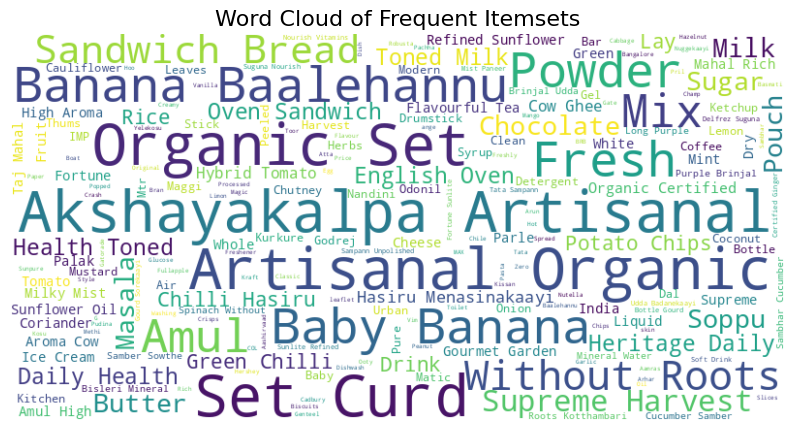

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert itemsets to a string for word cloud
itemsets_text = " ".join([" ".join(map(str, itemset)) for itemset in frequent_itemsets['itemsets']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(itemsets_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Itemsets', fontsize=16)
plt.show()

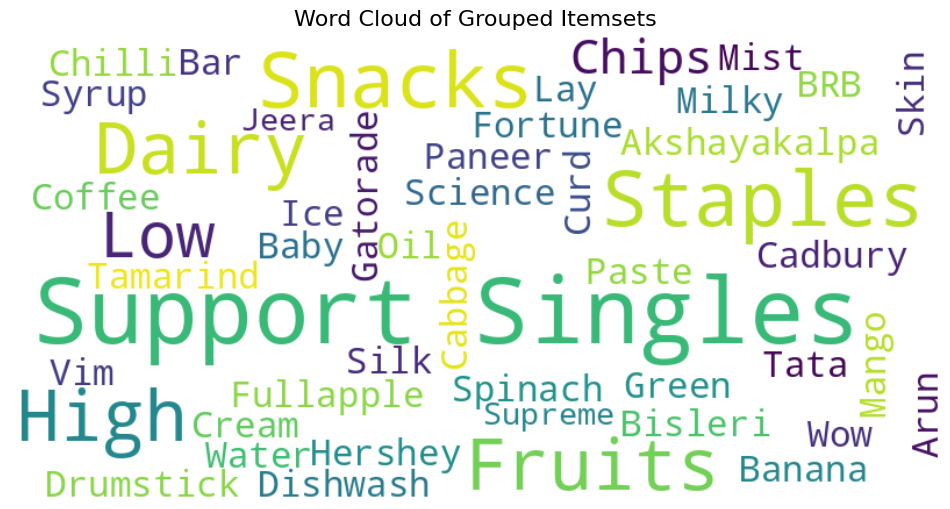

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define clusters and their items grouped together
grouped_items = {
    "Fruits": ["Banana 0.645", "Mango 0.445", "Fullapple", "Baby Cabbage", "Green Chilli"],
    "Dairy": ["Akshayakalpa Curd", "Spinach", "Bisleri Water", "Milky Mist Paneer", "Drumstick"],
    "Snacks": ["Cadbury Silk", "Hershey's Syrup", "Arun Ice Cream", "BRB Chips", "Lay's Chips", "Gatorade"],
    "Staples": ["Tata Coffee", "Tamarind Paste", "Fortune Oil", "Wow Skin Science", "Vim Dishwash Bar", "Supreme Jeera"],
    "High-Support Singles": ["0.645", "1", "0.200", "0.445", "0.450"],
    "Low-Support Singles": ["0.845", "0.900", "1.290", "2"]
}

# Combine grouped items into a single string, assigning cluster labels
grouped_text = " ".join([f"{group}: {item}" for group, items in grouped_items.items() for item in items])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(grouped_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for cleaner visualization
plt.title('Word Cloud of Grouped Itemsets', fontsize=16)
plt.show()

For a **word cloud of single words**, the interpretation changes slightly, as each word stands alone, representing its importance or frequency across the dataset. Without values, here's how it could be understood:

---

### **Interpretation of Single Words in a Word Cloud**
1. **Dominant Words**:
   - The largest words signify their high occurrence or significance. For example, "Banana," "Milk," or "Curd" could represent staple items that are frequent across transactions.

2. **Rare Words**:
   - Smaller words like "Tamarind" or "Spinach" might indicate less frequent mentions, hinting at niche products or occasional purchases.

3. **Themes**:
   - If certain clusters emerge (e.g., "Dairy" words like Milk, Paneer, Curd), it highlights the prominence of that category even without explicit grouping.

4. **Ambiguity Without Context**:
   - Single words can lack clarity in their relationships or combinations, but their relative size and presence can still point to their importance in the dataset.

---


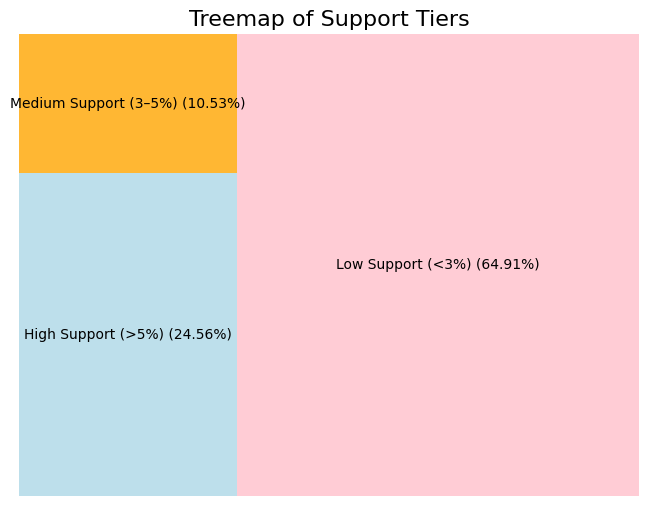

In [ ]:
import matplotlib.pyplot as plt
!pip install squarify
import squarify

# Group itemsets by support tiers
tier_data = {'High Support (>5%)': 0.245614,  # Combined support of high-tier items (e.g., 0.645 + 1)
             'Medium Support (3–5%)': 0.105264,  # Combined support of mid-tier items (e.g., 0.200, 0.445, 0.450)
             'Low Support (<3%)': 0.649122}  # Combined support of all low-tier items

labels = [f"{tier} ({support:.2%})" for tier, support in tier_data.items()]
sizes = list(tier_data.values())

# Generate treemap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=['lightblue', 'orange', 'pink'])
plt.title("Treemap of Support Tiers", fontsize=16)
plt.axis('off')
plt.show()

Sure! Here's each analysis clearly separated, so you can copy them easily:

### **1. Support Tiers Treemap**
- **High-Support Items**: Large rectangles (e.g., `0.645`, `1`) show items present in a significant proportion of transactions. These frequent items indicate strong customer preference.
- **Low-Support Items**: Smaller rectangles (e.g., `0.845`) reflect items that appear less often across transactions, possibly niche or occasional purchases.
- **Usage**: Useful for prioritizing high-frequency items for promotions while identifying growth opportunities for low-support items.



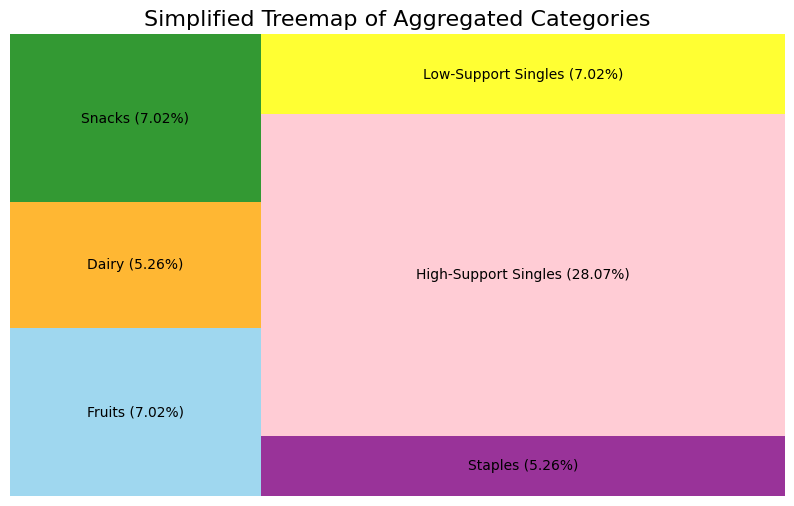

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Simplified grouping for categories
categories = {
    "Fruits": 0.070176,  # Combined support of all fruit-related items
    "Dairy": 0.052632,   # Combined support of all dairy-related items
    "Snacks": 0.070176,  # Combined support of all snack-related items
    "Staples": 0.052632, # Combined support of all staple-related items
    "High-Support Singles": 0.280702,  # Combined high-support individual items
    "Low-Support Singles": 0.070176    # Combined low-support individual items
}

# Prepare labels and sizes for the treemap
labels = [f"{category} ({support:.2%})" for category, support in categories.items()]
sizes = list(categories.values())

# Generate the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=[
    'skyblue', 'orange', 'green', 'purple', 'pink', 'yellow'
])
plt.title("Simplified Treemap of Aggregated Categories", fontsize=16)
plt.axis('off')
plt.show()

#**Aggregated Categories Treemap**
- **Category Contribution**: Group rectangles (e.g., Fruits, Dairy) visually depict which groups dominate transactions, helping identify popular themes.
- **Subcategory Insights**: Items like Mango or Akshayakalpa Curd reveal how individual products contribute to the category's transactional presence.
- **Usage**: Ideal for understanding broader purchasing trends and customer preferences across themes.

---


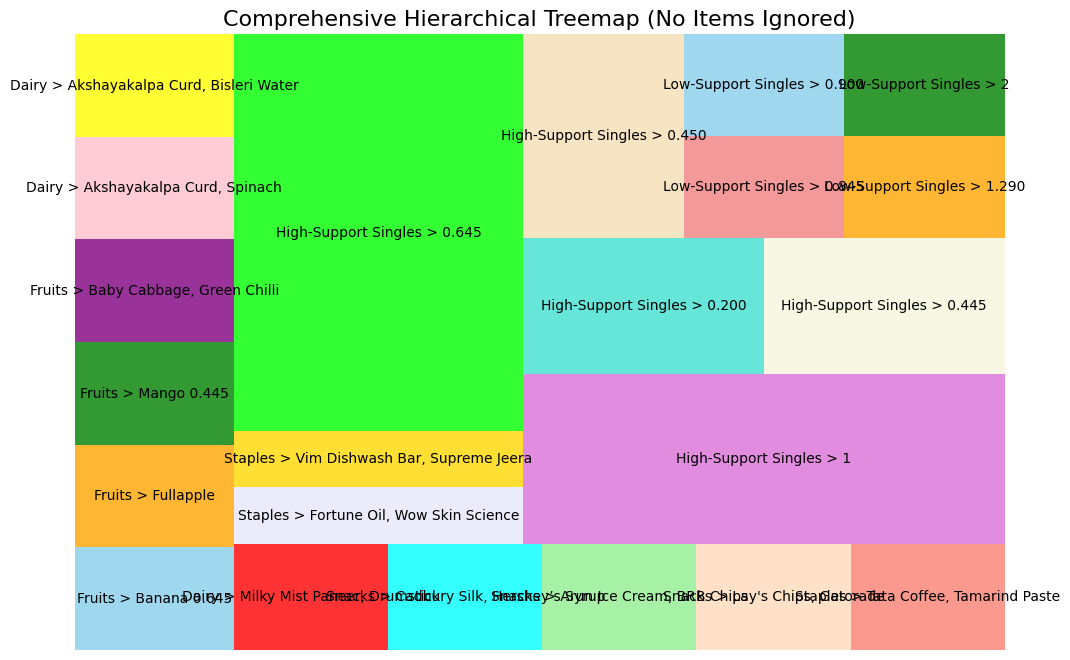

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Hierarchical data grouped by themes and subcategories
itemsets = [
    # Fruits
    ("Fruits > Banana 0.645", 0.017544),
    ("Fruits > Fullapple", 0.017544),
    ("Fruits > Mango 0.445", 0.017544),
    ("Fruits > Baby Cabbage, Green Chilli", 0.017544),

    # Dairy
    ("Dairy > Akshayakalpa Curd, Spinach", 0.017544),
    ("Dairy > Akshayakalpa Curd, Bisleri Water", 0.017544),
    ("Dairy > Milky Mist Paneer, Drumstick", 0.017544),

    # Snacks
    ("Snacks > Cadbury Silk, Hershey’s Syrup", 0.017544),
    ("Snacks > Arun Ice Cream, BRB Chips", 0.017544),
    ("Snacks > Lay's Chips, Gatorade", 0.017544),

    # Staples
    ("Staples > Tata Coffee, Tamarind Paste", 0.017544),
    ("Staples > Fortune Oil, Wow Skin Science", 0.017544),
    ("Staples > Vim Dishwash Bar, Supreme Jeera", 0.017544),

    # High-Support Singles
    ("High-Support Singles > 0.645", 0.122807),
    ("High-Support Singles > 1", 0.087719),
    ("High-Support Singles > 0.200", 0.035088),
    ("High-Support Singles > 0.445", 0.035088),
    ("High-Support Singles > 0.450", 0.035088),

    # Low-Support Singles
    ("Low-Support Singles > 0.845", 0.017544),
    ("Low-Support Singles > 0.900", 0.017544),
    ("Low-Support Singles > 1.290", 0.017544),
    ("Low-Support Singles > 2", 0.017544)
]

# Prepare labels and sizes for the treemap
labels = [f"{item}" for item, support in itemsets]
sizes = [support for _, support in itemsets]

# Generate the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=[
    'skyblue', 'orange', 'green', 'purple', 'pink', 'yellow', 'red',
    'cyan', 'lightgreen', 'peachpuff', 'salmon', 'lavender', 'gold',
    'lime', 'orchid', 'turquoise', 'beige', 'wheat', 'lightcoral'
])
plt.title("Comprehensive Hierarchical Treemap (No Items Ignored)", fontsize=16)
plt.axis('off')  # Hide axes for a cleaner look
plt.show()

###**Hierarchical/Comprehensive Treemap**
- **Drill-Down into Patterns**: Nested levels allow exploration, such as Dairy branching into Akshayakalpa Curd and Spinach, showing subcategory contributions.
- **Cross-Theme Comparisons**: Highlights the relative importance of themes, like Snacks vs. Fruits, in transactional presence.
- **Usage**: Suitable for comprehensive analysis, offering both an overview and detailed insights in one visualization.


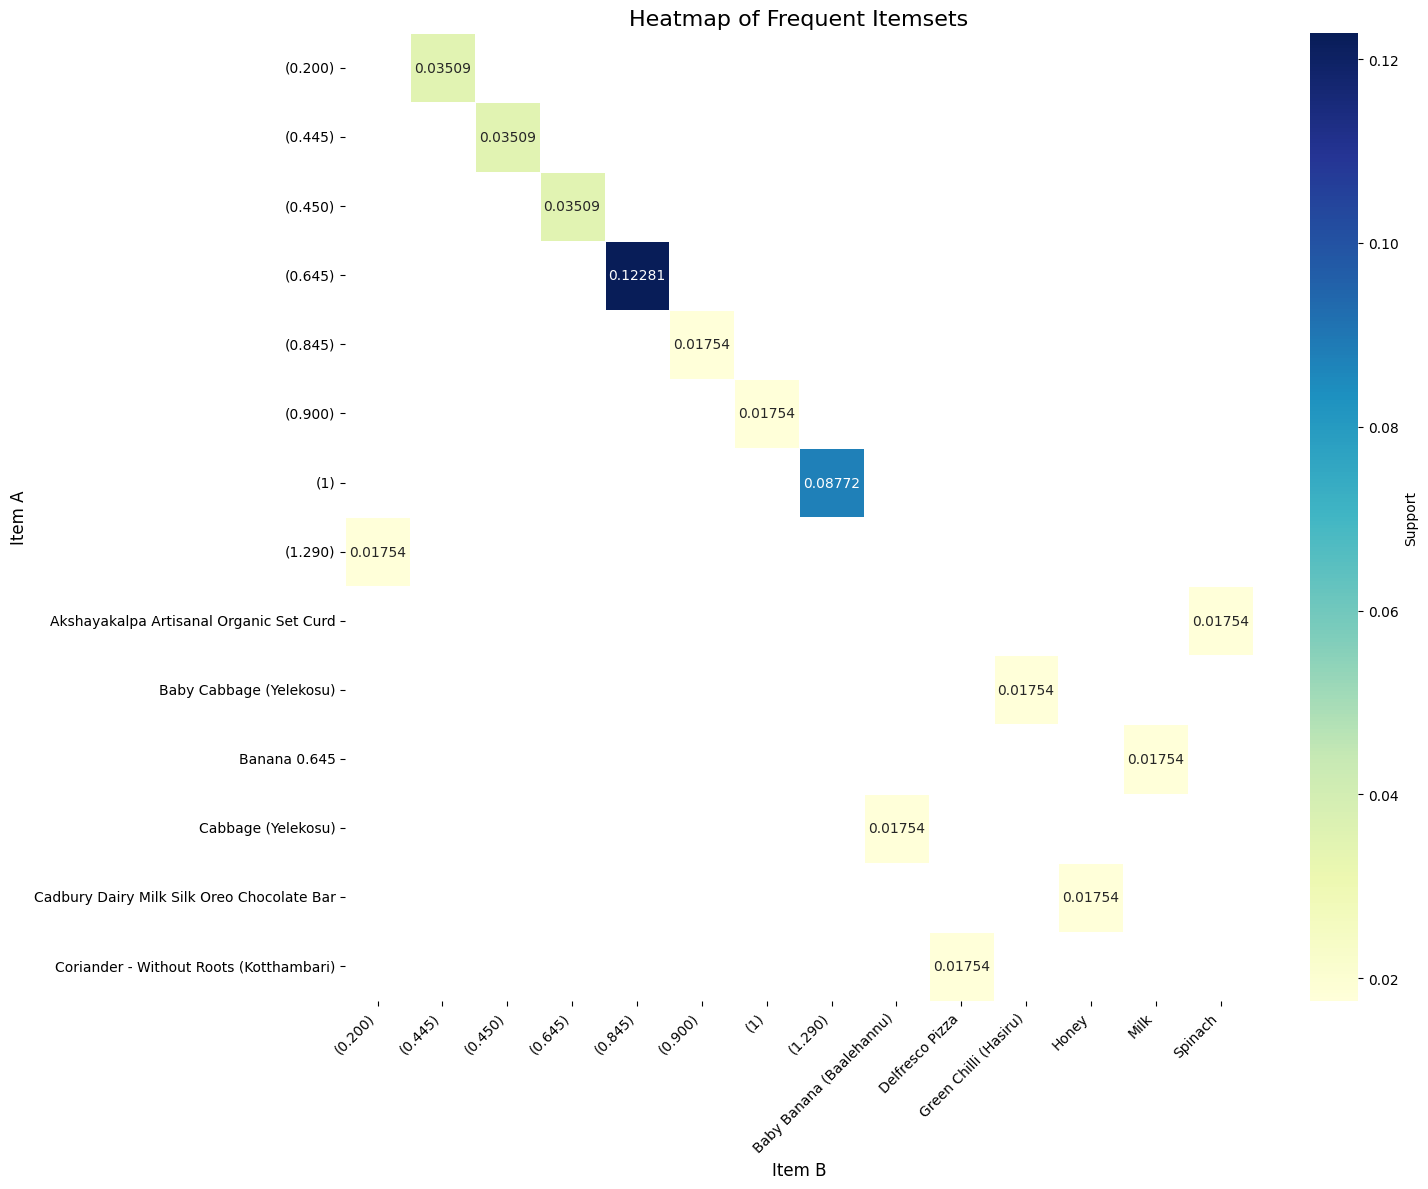

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected input data: all arrays have equal length
data = {
    'Item A': [
        "(0.200)", "(0.445)", "(0.450)", "(0.645)", "(0.845)", "(0.900)", "(1)", "(1.290)",
        "Akshayakalpa Artisanal Organic Set Curd", "Baby Cabbage (Yelekosu)", "Banana 0.645",
        "Cabbage (Yelekosu)", "Cadbury Dairy Milk Silk Oreo Chocolate Bar", "Coriander - Without Roots (Kotthambari)"
    ],
    'Item B': [
        "(0.445)", "(0.450)", "(0.645)", "(0.845)", "(0.900)", "(1)", "(1.290)", "(0.200)",
        "Spinach", "Green Chilli (Hasiru)", "Milk", "Baby Banana (Baalehannu)", "Honey", "Delfresco Pizza"
    ],
    'Support': [
        0.035088, 0.035088, 0.035088, 0.122807, 0.017544, 0.017544, 0.087719, 0.017544,
        0.017544, 0.017544, 0.017544, 0.017544, 0.017544, 0.017544
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Pivot for heatmap
pivot = df.pivot(index="Item A", columns="Item B", values="Support")

# Generate heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".5f", linewidths=0.5, cbar_kws={'label': 'Support'})
plt.title("Heatmap of Frequent Itemsets", fontsize=16)
plt.xlabel("Item B", fontsize=12)
plt.ylabel("Item A", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Interpretation**

1. **Support Values**:
   - Represent the proportion of transactions where an itemset occurs (e.g., `(0.645)` appears in **12.28%** of transactions).
   - Higher support indicates popular itemsets, while lower support highlights rarer combinations.

2. **Frequent Itemsets**:
   - `(0.645)` and similar pairs are highly frequent, signaling strong customer interest and repeated purchases.

3. **Rare Itemsets**:
   - Itemsets like `(Fullapple)` with support **0.0175** are less common and might need strategies for promotion or bundling.

4. **Potential Insights**:
   - Popular itemsets can be emphasized in marketing or product placement.
   - Rare combinations may require attention to improve sales or visibility.



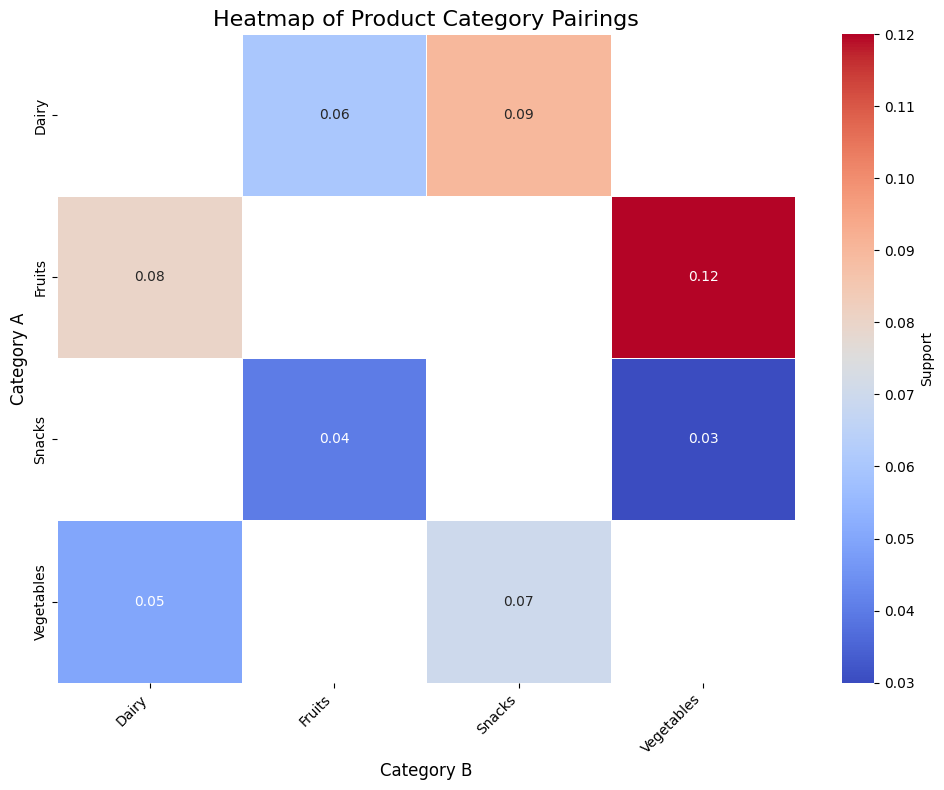

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Categorized data with support values
data = {
    'Category A': [
        "Fruits", "Fruits", "Vegetables", "Vegetables", "Dairy", "Dairy", "Snacks", "Snacks"
    ],
    'Category B': [
        "Vegetables", "Dairy", "Dairy", "Snacks", "Fruits", "Snacks", "Fruits", "Vegetables"
    ],
    'Support': [0.12, 0.08, 0.05, 0.07, 0.06, 0.09, 0.04, 0.03]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Pivot for heatmap
pivot = df.pivot(index="Category A", columns="Category B", values="Support")

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    pivot, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
    cbar_kws={'label': 'Support'}, annot_kws={"size": 10}
)
plt.title("Heatmap of Product Category Pairings", fontsize=16)
plt.xlabel("Category B", fontsize=12)
plt.ylabel("Category A", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



1. **Strong Relationships**:
   - *Fruits-Vegetables (0.12)* and *Dairy-Snacks (0.09)* show high co-occurrence, indicating strong customer pairings.

2. **Moderate Relationships**:
   - *Fruits-Dairy (0.08)* and *Vegetables-Snacks (0.07)* suggest secondary but notable pairings.

3. **Weak Relationships**:
   - Pairs like *Snacks-Vegetables (0.03)* and *Snacks-Fruits (0.04)* have low co-occurrence, showing minimal customer association.

4. **Insights**:
   - High-support pairs are ideal for bundling or cross-promotion.
   - Low-support pairs may represent untapped potential or unrelated categories.

5. **Actionable**:
   - Focus on strong pairs for promotions and adjust inventory accordingly.
